In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer
from files.Observer import TimeEvolutionObserver
from plot.Trajectory import Trajectory
from plot.Statistics import Statistics

## Simulation setup

#### Parameters

In [2]:
nr_particles = 10**1
nr_steps = 10**5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
mfp = np.array([3.75*10**13/4.0, 3.75*10**13/4.0, 7.2*10**13])  # [m]
delta_rho_div_phi = 1 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc
all_steps = False

In [3]:
sim = Simulation()

source = Source(gyro_radius, mfp, source_pos, nr_particles)
sim.add_source(source)

start simulation
observer
source


In [4]:
substeps = np.array([False, False, True]) # observe only steps (no substeps)
#steps = [0,1,2] # [-1] to observe all
steps = np.logspace(0, 5, 100)
steps_int32 = np.array(steps, dtype=np.int32) # np.array([-1])
observer = TimeEvolutionObserver()#Observer(steps_int32, substeps)
sim.add_observer(observer)

observer


In [5]:
%time sim.run_simulation(nr_steps)
sim.save_data('data')

CPU times: user 2.51 s, sys: 4.53 ms, total: 2.52 s
Wall time: 2.51 s


## Analyze statistics


In [20]:
#from plot.Trajectory import Trajectory

df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)
tra = Trajectory(df_time_evolution_observer, dimensions)
particle_ids = tra.get_particle_ids()
df

init statistics plotting class
init trajectory plotting class


,id,i,d,x,y,z,radius,step
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.0,2.0
1,0.0,1.0,5.000000e+09,2.810974e+09,3.030141e+09,2.886751e+09,-1.0,2.0
2,0.0,2.0,1.000000e+10,5.466976e+09,6.197000e+09,5.773502e+09,-1.0,2.0
3,0.0,3.0,1.500000e+10,7.961364e+09,9.492659e+09,8.660254e+09,-1.0,2.0
4,0.0,4.0,2.000000e+10,1.028790e+10,1.290888e+10,1.154700e+10,-1.0,2.0
...,...,...,...,...,...,...,...,...
885,9.0,55908.0,2.791469e+14,-1.217065e+12,4.962893e+11,1.613518e+14,-1.0,2.0
886,9.0,62802.0,3.138221e+14,-1.278004e+12,5.447161e+11,1.662113e+14,-1.0,2.0
887,9.0,70548.0,3.528089e+14,-1.221417e+12,4.181012e+11,1.438588e+14,-1.0,2.0
888,9.0,79248.0,3.965975e+14,-1.000567e+12,2.950061e+11,1.393514e+14,-1.0,2.0


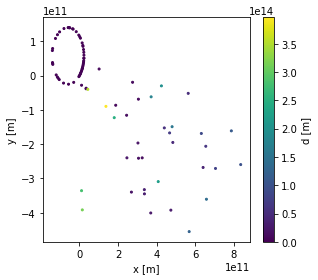

In [21]:
nr_steps = -1
tra.plot_trajectory('x', 'y', 'd', particle_ids[0], nr_steps, None)

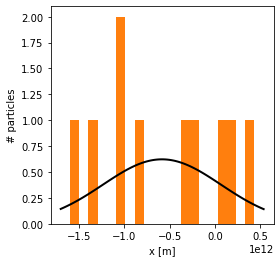

In [22]:
bins = 20
file_name = None
sta.plot_distribution('x', -1, bins, file_name)

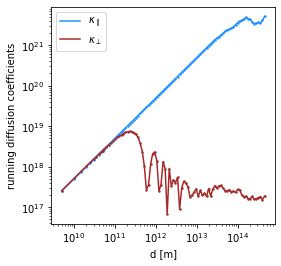

In [23]:
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)

In [8]:
df_kappas

,kappa_perp,kappa_para
0,2.560727e+17,2.498270e+17
1,5.118255e+17,4.996541e+17
2,7.669386e+17,7.494811e+17
3,1.021093e+18,9.993081e+17
4,1.273973e+18,1.249135e+18
...,...,...
3174,1.290582e+17,4.386411e+21
3175,1.298575e+17,4.387496e+21
3176,1.317737e+17,4.388582e+21
3177,1.343293e+17,4.389669e+21
